# Logistic Regression without using sklearn Librairy
## Multivariable data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from math import exp

In [2]:
dataframe = pd.read_csv('heart-disease.csv')

In [3]:
df = dataframe.copy()

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


checking for NaN values

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Using crosstab fuction of pandas librairy for seeing the relation between 2 columns

<AxesSubplot:xlabel='age'>

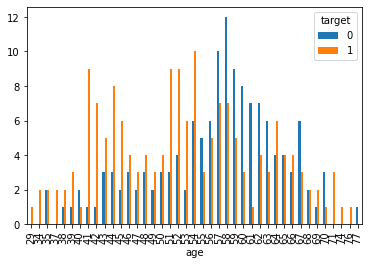

In [6]:
pd.crosstab(df.age,df.target).plot(kind='bar')

### Heatmap of the correlation matrix 

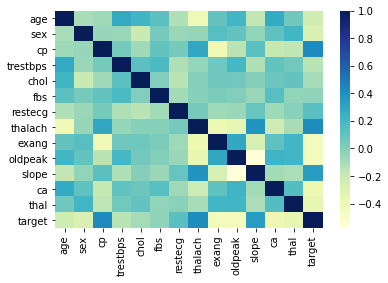

In [7]:
df_cor = df.corr()
sns.heatmap(df_cor, annot=False, cmap="YlGnBu");

In [8]:
Y = df.target.values
df.drop('target',axis=1,inplace=True)

### splitting into test train

In [9]:
xtrain,xtest,ytrain,ytest = tts(df,Y,test_size=0.2)

In [10]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(242, 13)
(242,)
(61, 13)
(61,)


# Logistic Regression using SKLEARN

In [11]:
logr = LogisticRegression(max_iter=100)
logr.fit(xtrain,ytrain)

C:\Users\parmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
print('weights=',logr.coef_[0],'\n\nbias=',logr.intercept_)

weights= [ 0.0320067  -1.02188846  0.73918083 -0.02451796 -0.00178093  0.04811519
  0.60131342  0.03737094 -0.95260326 -0.83342689  0.22359598 -0.74569537
 -1.02635838] 

bias= [0.01380141]


In [13]:
ypred= logr.predict(xtest)

In [14]:
logr.score(xtest,ytest)

0.7540983606557377

In [15]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.91      0.61      0.73        33
           1       0.67      0.93      0.78        28

    accuracy                           0.75        61
   macro avg       0.79      0.77      0.75        61
weighted avg       0.80      0.75      0.75        61



# Logistic Regression without SKLEARN

In [30]:
AL = 0.0001
itr = 1000
n=len(xtrain)
m = np.ones(xtrain.shape[1])
c=0
for i in range(itr):
    
    y_pred = 1 / (1 + np.exp(-(np.dot(xtrain,m)+c))) 
    D_m = (-1/n) * np.dot(xtrain.T,ytrain - y_pred) 
    D_c = (-1/n) * np.sum(ytrain - y_pred)

    m = m - AL * D_m
    c = c - AL * D_c

print('weights=',m,'\n\nbias=',c)

weights= [ 0.36231058  0.98451966  1.00576469 -0.24272922 -0.0352799   0.99785688
  0.99655003  0.09436311  0.98681071  0.96120114  0.99667199  0.96746941
  0.96852348] 

bias= -0.009051341610797991


In [31]:
Y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
sum(ytrain-Y_pred)

-5

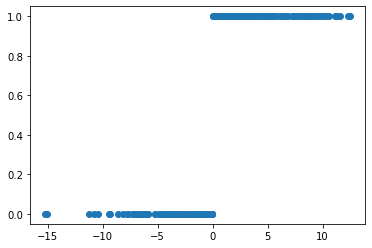

In [21]:
y_pred = 1 / (1 + np.exp(-(np.dot(xtrain,m)+c))) 
xx=np.dot(xtrain,m)+c
plt.scatter(xx,Y_pred)